# Welcome to our preliminary evaluation of standard models to predict the difficulty level of French text from A1 to C2. 

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
import pandas as pd

In [4]:
# Read the training and test data
df = pd.read_csv('../training/training_data.csv')

Here we visualize the data

In [5]:
df.head()

,id,sentence,difficulty
0,0,Les coûts kilométriques réels peuvent diverger...,C1
1,1,"Le bleu, c'est ma couleur préférée mais je n'a...",A1
2,2,Le test de niveau en français est sur le site ...,A1
3,3,Est-ce que ton mari est aussi de Boston?,A1
4,4,"Dans les écoles de commerce, dans les couloirs...",B1


In [6]:
df.tail()

,id,sentence,difficulty
4795,4795,"C'est pourquoi, il décida de remplacer les hab...",B2
4796,4796,Il avait une de ces pâleurs splendides qui don...,C1
4797,4797,"Et le premier samedi de chaque mois, venez ren...",A2
4798,4798,Les coûts liés à la journalisation n'étant pas...,C2
4799,4799,"Sur le sable, la mer haletait de toute la resp...",C2


In [43]:
df.info

<bound method DataFrame.info of         id                                           sentence difficulty
0        0  Les coûts kilométriques réels peuvent diverger...         C1
1        1  Le bleu, c'est ma couleur préférée mais je n'a...         A1
2        2  Le test de niveau en français est sur le site ...         A1
3        3           Est-ce que ton mari est aussi de Boston?         A1
4        4  Dans les écoles de commerce, dans les couloirs...         B1
...    ...                                                ...        ...
4795  4795  C'est pourquoi, il décida de remplacer les hab...         B2
4796  4796  Il avait une de ces pâleurs splendides qui don...         C1
4797  4797  Et le premier samedi de chaque mois, venez ren...         A2
4798  4798  Les coûts liés à la journalisation n'étant pas...         C2
4799  4799  Sur le sable, la mer haletait de toute la resp...         C2

[4800 rows x 3 columns]>

Here we compute and visualize the base rate, thus the accuracy obtained using a naive classifier that predicts that all observations are from the largest class 

In [7]:
# Calculate the base rate
base_rate = round((df['difficulty'].value_counts() / len(df)) * 100, 2)
print("The base rates for each difficulty level are:")
print(base_rate.astype(str) + '%')

The base rates for each difficulty level are:
difficulty
A1    16.94%
C2    16.81%
C1    16.62%
B1    16.56%
A2    16.56%
B2     16.5%
Name: count, dtype: object


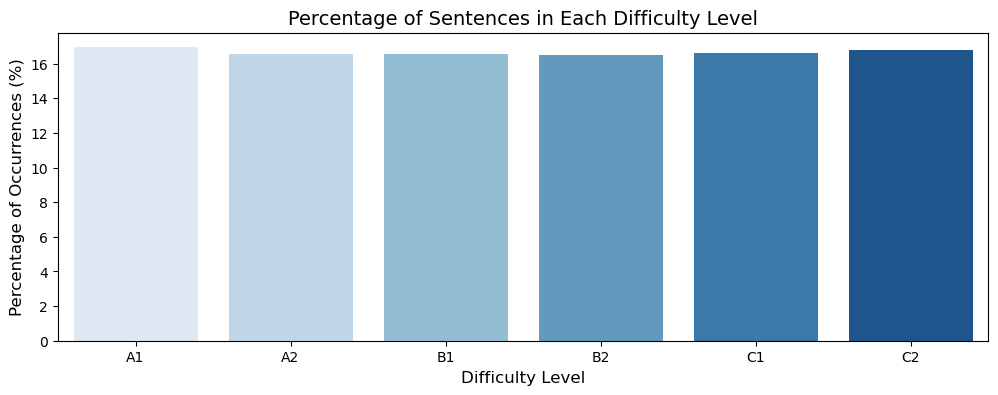

In [8]:
# Plot percentage of sentences per category
category_order = ['A1', 'A2', 'B1', 'B2', 'C1', 'C2']
palette = sns.color_palette("Blues", len(category_order))
plt.figure(figsize=(12,4))
sns.barplot(x=base_rate.index, y=base_rate.values, order=category_order, palette=palette)
plt.ylabel('Percentage of Occurrences (%)', fontsize=12)
plt.xlabel('Difficulty Level', fontsize=12)
plt.title('Percentage of Sentences in Each Difficulty Level', fontsize=14)
plt.xticks(rotation=0)
plt.show()

Here we prepare our data and set the standard model for a preliminary evaluation varying the vectorization technique (CountVectorizer, TfidfVectorizer). No cleaning on the data is performed. 

In [9]:
# Extract features and target variable
X = df['sentence']
ylabels = df['difficulty']

# Initialize the vectorizers and models
vectorizers = {
    'CountVectorizer': CountVectorizer(),
    'TfidfVectorizer': TfidfVectorizer()
}

models = {
    'LogisticRegression': LogisticRegression(max_iter=1000),
    'KNeighborsClassifier': KNeighborsClassifier(),
    'DecisionTreeClassifier': DecisionTreeClassifier(),
    'RandomForestClassifier': RandomForestClassifier()
}

# Color maps for each model
color_maps = {
    'LogisticRegression': 'Purples',
    'KNeighborsClassifier': 'Greens',
    'DecisionTreeClassifier': 'Oranges',
    'RandomForestClassifier': 'Blues'
}

# Dictionary to store the results
results = []

best_vectorizer_by_accuracy = {}

Here we train the models, evaluate their performance, display model evaluation metrics and visualize confusion matrices. We also identify the best vectorizer for each model.

Classification Report for LogisticRegression with CountVectorizer:
              precision    recall  f1-score   support

          A1       0.50      0.69      0.58       166
          A2       0.38      0.37      0.37       156
          B1       0.37      0.39      0.38       167
          B2       0.38      0.35      0.36       155
          C1       0.44      0.36      0.40       157
          C2       0.52      0.43      0.47       159

    accuracy                           0.43       960
   macro avg       0.43      0.43      0.43       960
weighted avg       0.43      0.43      0.43       960



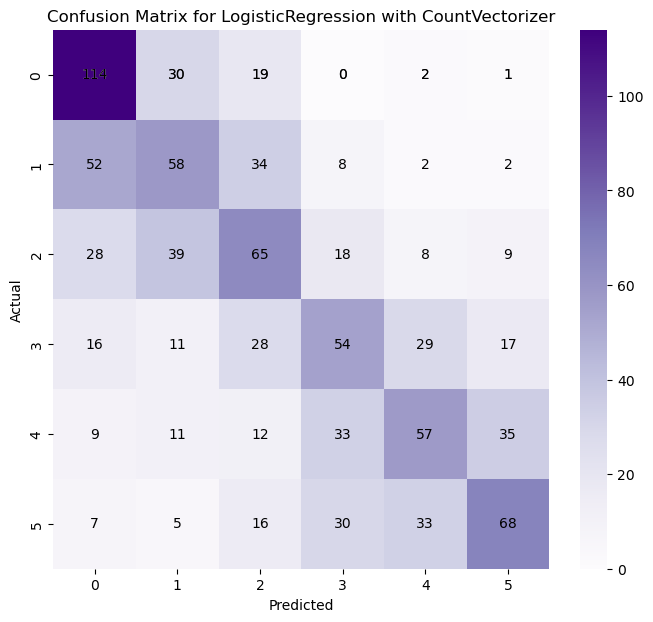

Classification Report for KNeighborsClassifier with CountVectorizer:
              precision    recall  f1-score   support

          A1       0.21      0.98      0.35       166
          A2       0.12      0.09      0.10       156
          B1       0.21      0.05      0.09       167
          B2       0.22      0.04      0.07       155
          C1       0.33      0.01      0.02       157
          C2       0.89      0.05      0.10       159

    accuracy                           0.21       960
   macro avg       0.33      0.20      0.12       960
weighted avg       0.33      0.21      0.12       960



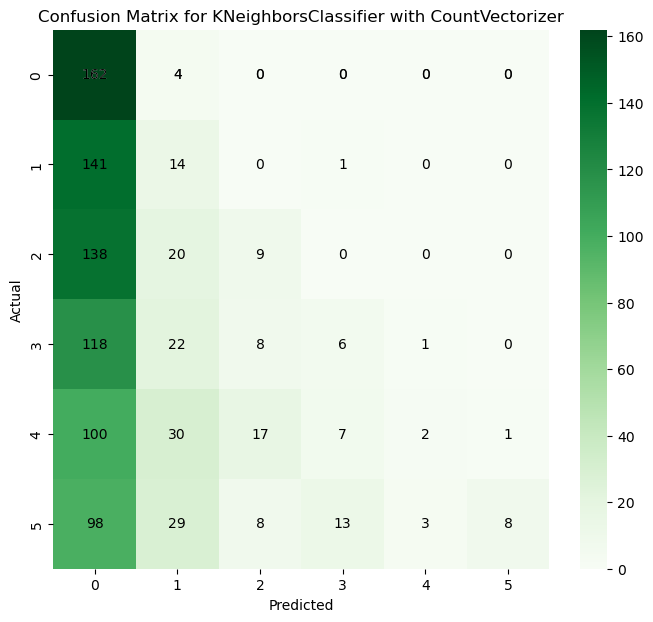

Classification Report for DecisionTreeClassifier with CountVectorizer:
              precision    recall  f1-score   support

          A1       0.49      0.49      0.49       166
          A2       0.25      0.30      0.27       156
          B1       0.21      0.20      0.21       167
          B2       0.23      0.20      0.21       155
          C1       0.30      0.31      0.31       157
          C2       0.27      0.26      0.27       159

    accuracy                           0.30       960
   macro avg       0.29      0.29      0.29       960
weighted avg       0.29      0.30      0.29       960



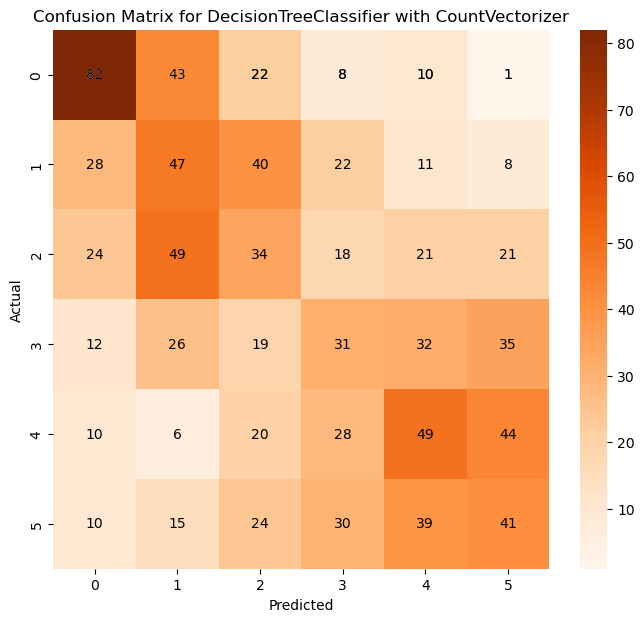

Classification Report for RandomForestClassifier with CountVectorizer:
              precision    recall  f1-score   support

          A1       0.39      0.79      0.52       166
          A2       0.32      0.29      0.31       156
          B1       0.34      0.29      0.31       167
          B2       0.34      0.31      0.32       155
          C1       0.40      0.24      0.30       157
          C2       0.56      0.36      0.44       159

    accuracy                           0.38       960
   macro avg       0.39      0.38      0.37       960
weighted avg       0.39      0.38      0.37       960



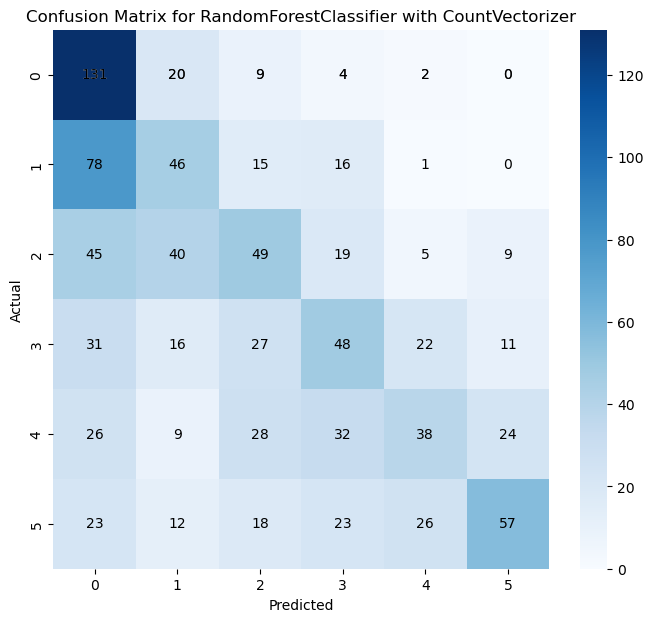

Classification Report for LogisticRegression with TfidfVectorizer:
              precision    recall  f1-score   support

          A1       0.48      0.58      0.53       166
          A2       0.40      0.31      0.35       156
          B1       0.40      0.35      0.37       167
          B2       0.38      0.38      0.38       155
          C1       0.45      0.47      0.46       157
          C2       0.46      0.48      0.47       159

    accuracy                           0.43       960
   macro avg       0.43      0.43      0.43       960
weighted avg       0.43      0.43      0.43       960



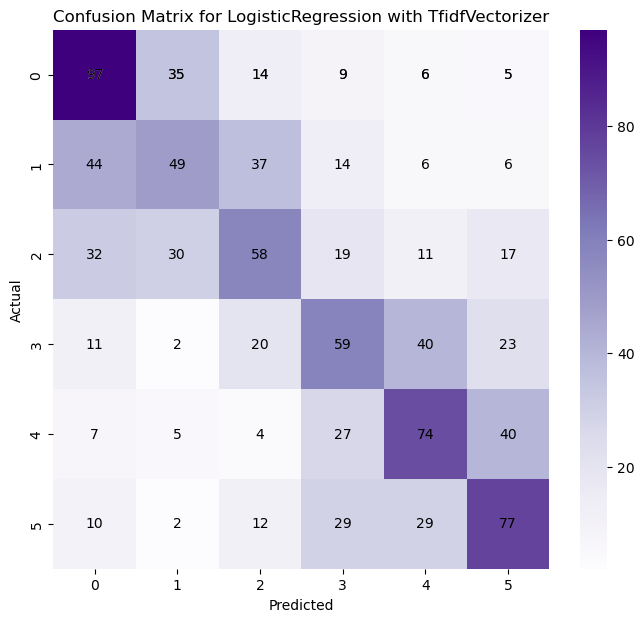

Classification Report for KNeighborsClassifier with TfidfVectorizer:
              precision    recall  f1-score   support

          A1       0.27      0.79      0.40       166
          A2       0.21      0.26      0.23       156
          B1       0.19      0.14      0.16       167
          B2       0.44      0.18      0.26       155
          C1       0.47      0.15      0.23       157
          C2       0.62      0.18      0.28       159

    accuracy                           0.29       960
   macro avg       0.37      0.28      0.26       960
weighted avg       0.36      0.29      0.26       960



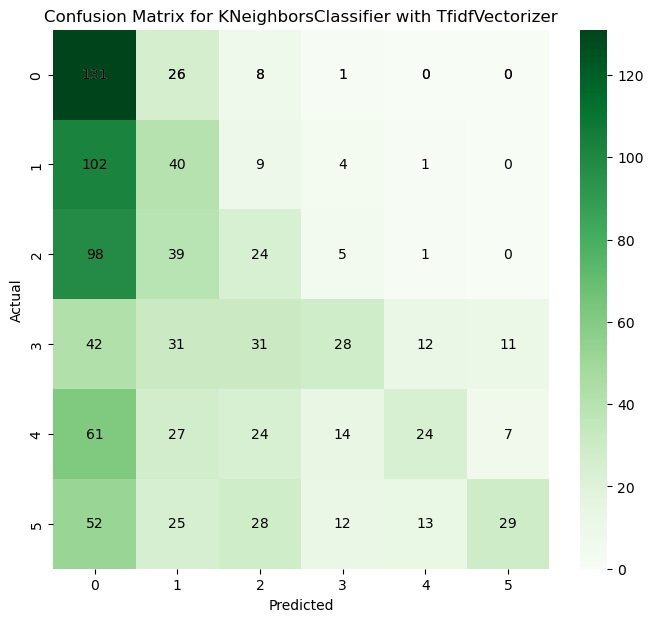

Classification Report for DecisionTreeClassifier with TfidfVectorizer:
              precision    recall  f1-score   support

          A1       0.48      0.45      0.47       166
          A2       0.30      0.33      0.32       156
          B1       0.27      0.21      0.23       167
          B2       0.25      0.28      0.27       155
          C1       0.27      0.29      0.28       157
          C2       0.32      0.31      0.32       159

    accuracy                           0.31       960
   macro avg       0.32      0.31      0.31       960
weighted avg       0.32      0.31      0.31       960



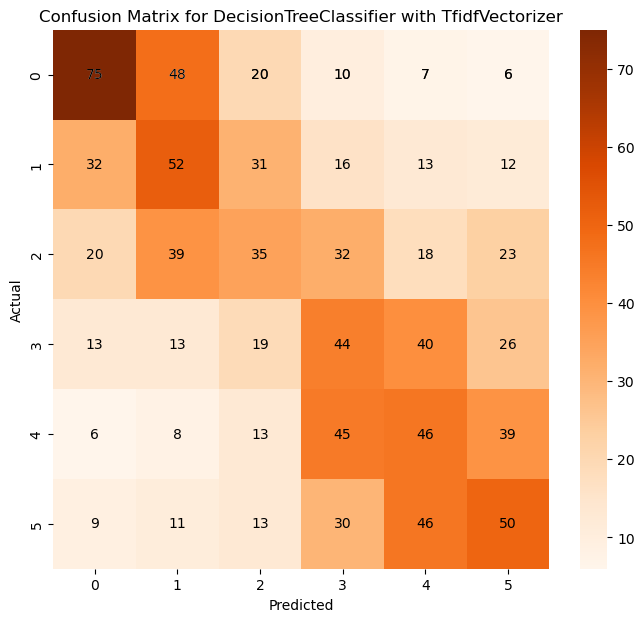

Classification Report for RandomForestClassifier with TfidfVectorizer:
              precision    recall  f1-score   support

          A1       0.47      0.72      0.57       166
          A2       0.35      0.31      0.33       156
          B1       0.32      0.22      0.26       167
          B2       0.33      0.38      0.36       155
          C1       0.41      0.38      0.39       157
          C2       0.49      0.41      0.45       159

    accuracy                           0.40       960
   macro avg       0.39      0.40      0.39       960
weighted avg       0.40      0.40      0.39       960



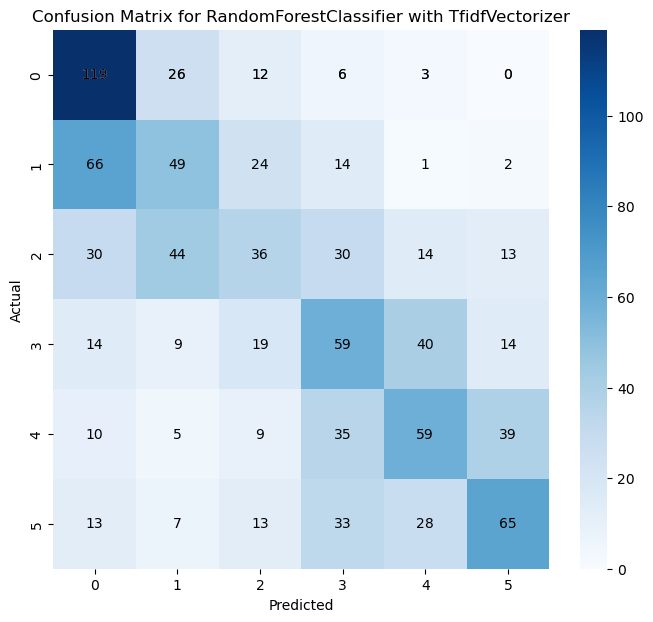

Best vectorizer by accuracy for each model:
LogisticRegression: CountVectorizer (Accuracy: 0.43)
KNeighborsClassifier: TfidfVectorizer (Accuracy: 0.29)
DecisionTreeClassifier: TfidfVectorizer (Accuracy: 0.31)
RandomForestClassifier: TfidfVectorizer (Accuracy: 0.40)


In [10]:
# Iterate through each vectorizer
for vec_name, vectorizer in vectorizers.items():
    # Vectorize the data
    X_vectorized = vectorizer.fit_transform(X)

    # Perform train-test split
    X_train, X_test, y_train, y_test = train_test_split(X_vectorized, ylabels, test_size=0.2, random_state=1234)

    # Iterate through each model
    for model_name, model in models.items():
        # Train the model
        model.fit(X_train, y_train)
        
        # Predict the test set
        y_pred = model.predict(X_test)
        
        # Calculate metrics
        accuracy = accuracy_score(y_test, y_pred)
        precision = precision_score(y_test, y_pred, average='macro')
        recall = recall_score(y_test, y_pred, average='macro')
        f1 = f1_score(y_test, y_pred, average='macro')
        
        # Track best vectorizer by accuracy
        if model_name not in best_vectorizer_by_accuracy or best_vectorizer_by_accuracy[model_name][1] < accuracy:
            best_vectorizer_by_accuracy[model_name] = (vec_name, accuracy)

        # Store the results
        results.append({
            'Vectorizer': vec_name,
            'Model': model_name,
            'Accuracy': accuracy,
            'Precision': precision,
            'Recall': recall,
            'F1-Score': f1
        })

        # Print classification report
        print(f'Classification Report for {model_name} with {vec_name}:')
        print(classification_report(y_test, y_pred))
        
        # Plot confusion matrix
        conf_mat = confusion_matrix(y_test, y_pred)
        fig, ax = plt.subplots(figsize=(8, 7))
        sns.heatmap(conf_mat, annot=True, fmt='d', cmap=color_maps[model_name], ax=ax)
        # Annotating each cell with the numerical value
        for i in range(len(conf_mat)):
            for j in range(len(conf_mat[i])):
                ax.text(j+0.5, i+0.5, f'{conf_mat[i, j]}', horizontalalignment='center', verticalalignment='center', color='black', fontsize=10)
        plt.ylabel('Actual')
        plt.xlabel('Predicted')
        plt.title(f'Confusion Matrix for {model_name} with {vec_name}')
        plt.show()

# Summarize best vectorizer for accuracy for each model
print("Best vectorizer by accuracy for each model:")
for model, (vec, acc) in best_vectorizer_by_accuracy.items():
    print(f"{model}: {vec} (Accuracy: {acc:.2f})")

Here we summarize performance metrics across models

In [11]:
# Create a DataFrame from the results
results_df = pd.DataFrame(results)

# Define the metrics and models
metrics = ['Precision', 'Recall', 'F1-Score', 'Accuracy']
models = ['LogisticRegression', 'KNeighborsClassifier', 'DecisionTreeClassifier', 'RandomForestClassifier']

# Initialize a dictionary to hold the best scores for each model
best_scores = {metric: {model: 0 for model in models} for metric in metrics}

# Iterate through each model and metric to find the best score
for model in models:
    for metric in metrics:
        # Get the maximum value for each metric for each model
        best_scores[metric][model] = results_df[results_df['Model'] == model][metric].max()

# Convert the dictionary of best scores into a DataFrame
summary_df = pd.DataFrame(best_scores)

# Transpose the DataFrame to match the desired table format
summary_df = summary_df.transpose()

# Print or return the summary DataFrame
print(summary_df)

           LogisticRegression  KNeighborsClassifier  DecisionTreeClassifier  \
Precision            0.430417              0.366829                0.315805   
Recall               0.431147              0.284197                0.314342   
F1-Score             0.427110              0.261230                0.314016   
Accuracy             0.433333              0.287500                0.314583   

           RandomForestClassifier  
Precision                0.394960  
Recall                   0.401964  
F1-Score                 0.391493  
Accuracy                 0.403125  


Here we tuned the kNN classifier and add the metrics to the results DataFrame

In [14]:
# Define best vectorizer for kNN classifier
best_vectorizer = TfidfVectorizer()

# Vectorize the data
X_best_vectorized = best_vectorizer.fit_transform(X)

# Perform train-test split
X_train_tune, X_test_tune, y_train_tune, y_test_tune = train_test_split(X_best_vectorized, ylabels, test_size=0.2, random_state=1234)

# Define the parameter grid
param_grid = {'n_neighbors': range(1, 16)}

# Initialize the kNN classifier
knn_classifier = KNeighborsClassifier()

# Initialize GridSearchCV
grid_search = GridSearchCV(knn_classifier, param_grid, cv=5, scoring='accuracy', return_train_score=False, verbose=1)

# Perform grid search to find the best value of n_neighbors
grid_search.fit(X_train_tune, y_train_tune)

# Get the best value of n_neighbors
best_n_neighbors = grid_search.best_params_['n_neighbors']
print(f"Best value of 'n_neighbors': {best_n_neighbors}")

# Initialize the kNN classifier with the best value of n_neighbors
best_knn_classifier = KNeighborsClassifier(n_neighbors=best_n_neighbors)

# Train the kNN classifier with the best value of n_neighbors
best_knn_classifier.fit(X_train_tune, y_train_tune)

# Evaluate the performance of the best kNN classifier
predictions_knn_best = best_knn_classifier.predict(X_test_tune)

# Calculate metrics for the tuned kNN
best_test_accuracy_knn = accuracy_score(y_test_tune, predictions_knn_best)
best_test_precision_knn = precision_score(y_test_tune, predictions_knn_best, average='macro')
best_test_recall_knn = recall_score(y_test_tune, predictions_knn_best, average='macro')
best_test_f1_knn = f1_score(y_test_tune, predictions_knn_best, average='macro')

# Update the summary table with these metrics
summary_df.loc['Precision', 'Tuned KNeighborsClassifier'] = best_test_precision_knn
summary_df.loc['Recall', 'Tuned KNeighborsClassifier'] = best_test_recall_knn
summary_df.loc['F1-Score', 'Tuned KNeighborsClassifier'] = best_test_f1_knn
summary_df.loc['Accuracy', 'Tuned KNeighborsClassifier'] = best_test_accuracy_knn

# Print the updated summary DataFrame
print(summary_df)

# Convert all numeric values in summary_df to two decimal places
for column in summary_df.columns:
    summary_df[column] = summary_df[column].apply(lambda x: round(x, 2))

Fitting 5 folds for each of 15 candidates, totalling 75 fits
Best value of 'n_neighbors': 1
           LogisticRegression  KNeighborsClassifier  DecisionTreeClassifier  \
Precision                0.43                  0.37                    0.32   
Recall                   0.43                  0.28                    0.31   
F1-Score                 0.43                  0.26                    0.31   
Accuracy                 0.43                  0.29                    0.31   

           RandomForestClassifier  Tuned KNeighborsClassifier  
Precision                    0.39                    0.430664  
Recall                       0.40                    0.371367  
F1-Score                     0.39                    0.361936  
Accuracy                     0.40                    0.373958  
